In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kamrannaseer","key":"86bfee909777b6a9a32c48d76ca589d5"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d moltean/fruits

 99% 750M/760M [00:03<00:00, 263MB/s]
100% 760M/760M [00:03<00:00, 229MB/s]


In [8]:
!mkdir moltean

In [9]:
! unzip fruits.zip -d moltean

Streaming output truncated to the last 5000 lines.
  inflating: moltean/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: moltean/fruits-360/Training/Tomato 3/126

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.layers import Dense
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from glob import glob

In [11]:
train_path = "/content/moltean/fruits-360/Training/"
test_path = "/content/moltean/fruits-360/Test/"

In [12]:
img = load_img(train_path + "Avocado/0_100.jpg")

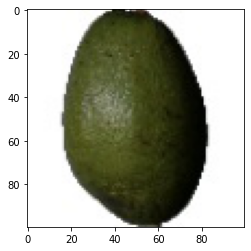

In [13]:
plt.imshow(img)
plt.show();

In [14]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [15]:
numberOfClass = len(glob(train_path + "/*"))

In [16]:
numberOfClass

131

In [17]:
vgg = VGG16()

553467904/553467096 [==============================] - 3s 0us/step


In [18]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
vgg_layer_list = vgg.layers
print(len(vgg_layer_list))

23


In [20]:
vgg_layer_list[-1]

In [21]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [23]:
for layers in model.layers:
    layers.trainable = False

In [24]:
model.add(Dense(numberOfClass,activation="softmax"))

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [26]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [27]:
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224))

Found 67692 images belonging to 131 classes.


In [28]:
test_data = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224))

Found 22688 images belonging to 131 classes.


In [29]:
batch_size=64

In [30]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs=10,
                           validation_data=test_data,
                           validation_steps=800//batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 13s 190ms/step - loss: 8.2447 - accuracy: 0.1469 - val_loss: 2.7667 - val_accuracy: 0.4271
Epoch 2/10
25/25 [==============================] - 4s 172ms/step - loss: 1.9316 - accuracy: 0.5159 - val_loss: 1.7348 - val_accuracy: 0.5677
Epoch 3/10
25/25 [==============================] - 4s 172ms/step - loss: 1.0901 - accuracy: 0.6868 - val_loss: 1.4707 - val_accuracy: 0.6406
Epoch 4/10
25/25 [==============================] - 4s 174ms/step - loss: 0.8018 - accuracy: 0.7662 - val_loss: 1.1200 - val_accuracy: 0.7344
Epoch 5/10
25/25 [==============================] - 4s 174ms/step - loss: 0.7152 - accuracy: 0.8241 - val_loss: 0.9196 - val_accuracy: 0.7917
Epoch 6/10
25/25 [==============================] - 4s 173ms/step - loss: 0.4266 - accuracy: 0.8680 - val_loss: 0.8417 - val_accuracy: 0.7891
Epoch 7/10
25/25 [==============================] - 4s 175ms/step - loss: 0.3145 - accuracy: 0.8969 - val_loss: 0.9367 - val_accuracy: 0.8073
Epoch

In [31]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


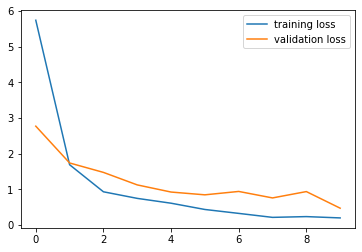

In [32]:
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend()
plt.show();

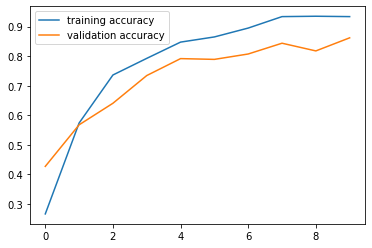

In [33]:
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show();

In [34]:
model.save("Fruit_Classification.h5")